In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df.describe()

,Quantity,UnitPrice,Year,Hour,Sale
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,2010.921609,13.078729,17.987795
std,218.081158,96.759853,0.268787,2.443270,378.810824
min,-80995.000000,-11062.060000,2010.000000,6.000000,-168469.600000
25%,1.000000,1.250000,2011.000000,11.000000,3.400000
50%,3.000000,2.080000,2011.000000,13.000000,9.750000
75%,10.000000,4.130000,2011.000000,15.000000,17.400000
max,80995.000000,38970.000000,2011.000000,20.000000,168469.600000


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df['StockCode'].nunique()
#criteria for clustering

4070

In [8]:
df['Description'].nunique()

4223

In [9]:
df['InvoiceNo'].nunique()

25900

In [10]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

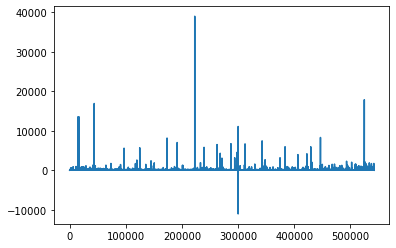

In [11]:
plt.plot(df['UnitPrice'])

In [12]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


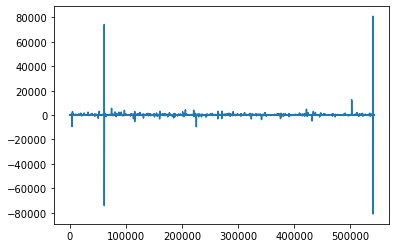

In [13]:
plt.plot(df['Quantity'])

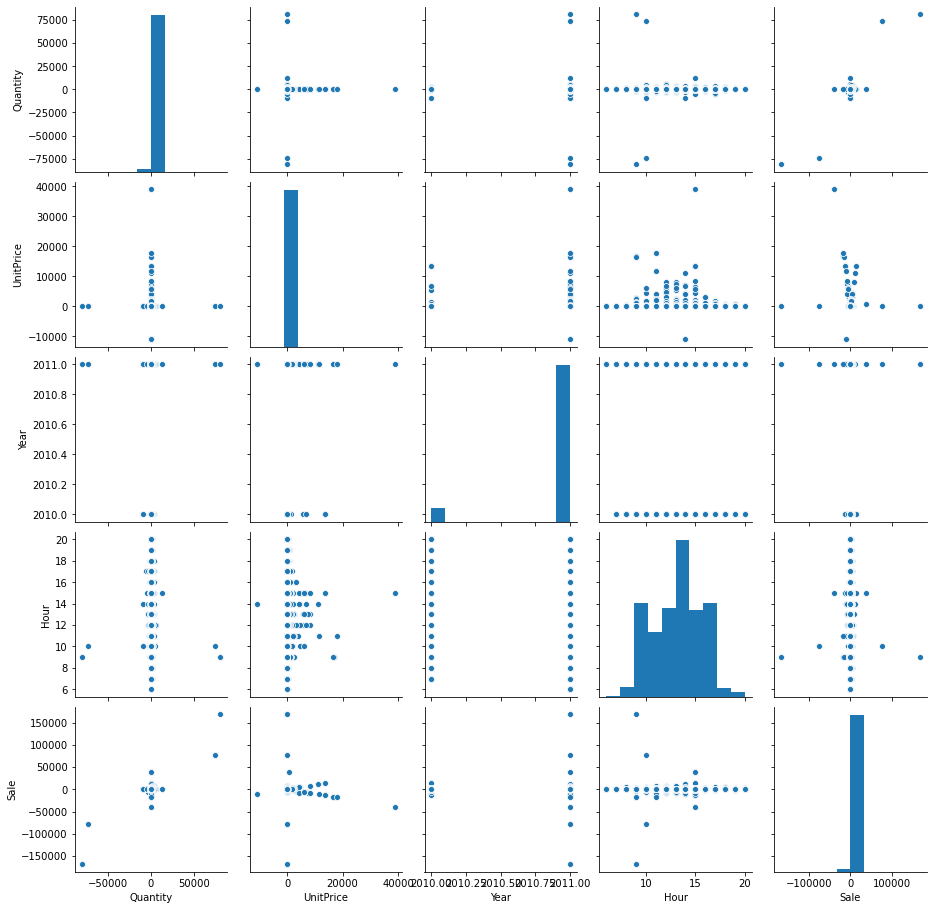

In [62]:
sns.pairplot(df)

In [15]:
cancelled=df[df['Quantity']<0]
cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
cancelled[cancelled['Quantity']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [17]:
cancelled['InvoiceNo'].iloc[0]

'C536379'

In [18]:
df['Cancelled']=df.InvoiceNo.apply(lambda x: 'Yes' if x[0]=='C' else 'No')

In [147]:
df['Year']=df['InvoiceDate'].dt.year
df['MonthYear']=df.InvoiceDate.dt.to_period('M')
months=['zero','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
df['MonthName']=df['InvoiceDate'].dt.month.apply(lambda x: months[x])
df['Month']=df['InvoiceDate'].dt.month
df['DayName']=df['InvoiceDate'].dt.day_name()
df['Day']=df['InvoiceDate'].dt.day

df['Hour']=df.InvoiceDate.dt.hour

In [148]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancelled,Year,MonthYear,Month,Day,Hour,Sale,DayName,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,36,No,2010,2010-12,12,1,8,15.30,Wednesday,Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,36,No,2010,2010-12,12,1,8,20.34,Wednesday,Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,36,No,2010,2010-12,12,1,8,22.00,Wednesday,Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,36,No,2010,2010-12,12,1,8,20.34,Wednesday,Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,36,No,2010,2010-12,12,1,8,20.34,Wednesday,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,13,No,2011,2011-12,12,9,12,10.20,Friday,Dec
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,13,No,2011,2011-12,12,9,12,12.60,Friday,Dec
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,13,No,2011,2011-12,12,9,12,16.60,Friday,Dec
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,13,No,2011,2011-12,12,9,12,16.60,Friday,Dec


In [21]:
df['Sale']=df['Quantity']*df['UnitPrice']


In [ ]:
le = LabelEncoder()
le.fit(df['Country'])
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))


In [29]:
df.drop(['CustomerID'],axis=1,inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cancelled,Year,MonthYear,Month,Day,Hour,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,No,2010,2010-12,Dec,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,No,2010,2010-12,Dec,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,No,2010,2010-12,Dec,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,No,2010,2010-12,Dec,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,No,2010,2010-12,Dec,Wednesday,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,No,2011,2011-12,Dec,Friday,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,No,2011,2011-12,Dec,Friday,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,No,2011,2011-12,Dec,Friday,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,No,2011,2011-12,Dec,Friday,12,16.60


In [36]:
df['Hour'].value_counts()

12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: Hour, dtype: int64

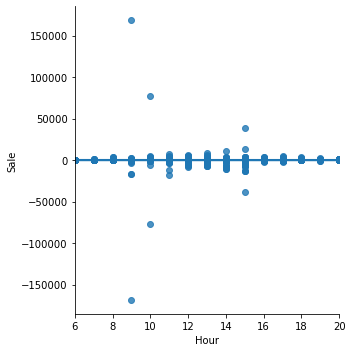

In [61]:
sns.lmplot('Hour','Sale',df)

In [37]:
df['Month'].value_counts()

Nov     84711
Dec     68006
Oct     60742
Sept    50226
Jul     39518
May     37030
Jun     36874
Mar     36748
Aug     35284
Jan     35147
Apr     29916
Feb     27707
Name: Month, dtype: int64

In [39]:
df['Day'].value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: Day, dtype: int64

In [46]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [50]:
df['Sale'].value_counts()

 15.00      20267
 1.25        9550
 2.46        9275
 17.70       9250
 4.13        8811
            ...  
 925.44         1
-4383.62        1
 212.75         1
 1.40           1
-5791.18        1
Name: Sale, Length: 6204, dtype: int64

In [52]:
df['Description']=df['Description'].astype(str)

In [53]:
frequency= pd.Series(' '.join(df['Description']).split()).value_counts()

In [58]:
frequency[:30]

SET           54575
OF            53351
BAG           51911
RED           42902
HEART         38714
RETROSPOT     35126
VINTAGE       33748
DESIGN        30066
PINK          29526
CHRISTMAS     25131
BOX           24403
CAKE          21461
JUMBO         21139
METAL         20842
WHITE         20813
BLUE          19316
3             18695
LUNCH         18525
HANGING       17037
SIGN          16998
HOLDER        16261
PACK          15637
T-LIGHT       14559
PAPER         14365
SMALL         14333
CARD          13280
6             13146
DECORATION    12981
WOODEN        12708
POLKADOT      12472
dtype: int64

In [60]:
frequency[-20:]

BANNER       1
DEMI         1
GLASSES      1
came         1
error        1
FOUND        1
WRAPS        1
hodge        1
zero         1
OPULENT      1
?display?    1
£100.00      1
no           1
BAZAAR       1
ICONS        1
oops         1
was          1
Water        1
(22467)      1
this         1
dtype: int64

In [67]:
df.groupby('InvoiceNo').mean()

,Quantity,UnitPrice,Year,Hour,Sale
InvoiceNo,,,,,
536365,5.714286,3.910000,2010.0,8.0,19.874286
536366,6.000000,1.850000,2010.0,8.0,11.100000
536367,6.916667,4.853333,2010.0,8.0,23.227500
536368,3.750000,4.775000,2010.0,8.0,17.512500
536369,3.000000,5.950000,2010.0,8.0,17.850000
...,...,...,...,...,...
C581484,-80995.000000,2.080000,2011.0,9.0,-168469.600000
C581490,-11.500000,1.390000,2011.0,9.0,-16.265000
C581499,-1.000000,224.690000,2011.0,10.0,-224.690000


In [136]:
monthlySale = df.groupby(['MonthYear'],as_index = False).agg({'Sale':'sum'})

In [137]:
monthlySale


,MonthYear,Sale
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [92]:
kmeans=KMeans(n_clusters=2)

In [149]:
X=df[['Sale','Country']]
kmeans.fit(X)

KMeans(n_clusters=2)

In [152]:
kmeans.cluster_centers_


array([[ 1.84411737e+01,  3.42597660e+01],
       [-1.22826600e+05,  3.60000000e+01]])

In [161]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

print(pd.DataFrame(inertias,columns=['inertia_values']))

   inertia_values
0    7.778350e+10
1    4.939538e+10
2    2.101949e+10
3    1.426946e+10
4    7.527831e+09
5    5.168661e+09
6    4.411553e+09
7    3.244630e+09
8    2.304085e+09
9    1.793291e+09
